In [190]:
import pandas as pd
import matplotlib.pyplot as plt

In [191]:
data = pd.read_excel('data/NumML_Blatt01_Daten.xlsx')
data

,Unnamed: 0,x,y
0,0,15,147.739399
1,1,6,636.133394
2,2,22,-492.173875
3,3,57,4597.827502
4,4,45,1667.594064
...,...,...,...
1995,1995,35,452.759114
1996,1996,50,2575.068872
1997,1997,51,3108.411131
1998,1998,5,-572.969782


<Axes: xlabel='x', ylabel='y'>

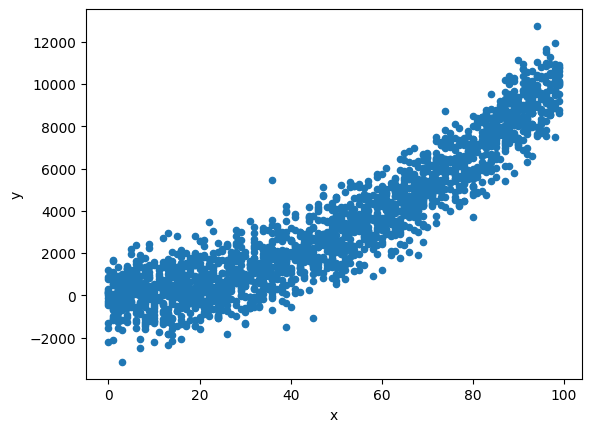

In [192]:
data.plot(x="x", y="y", kind="scatter")

## Modell: $y=\beta x$

In [193]:
import numpy as np
from sklearn import linear_model

modell = linear_model.LinearRegression(fit_intercept = False)

modell.fit(np.c_[data['x']], data['y'])

modell.coef_

array([78.10356031])

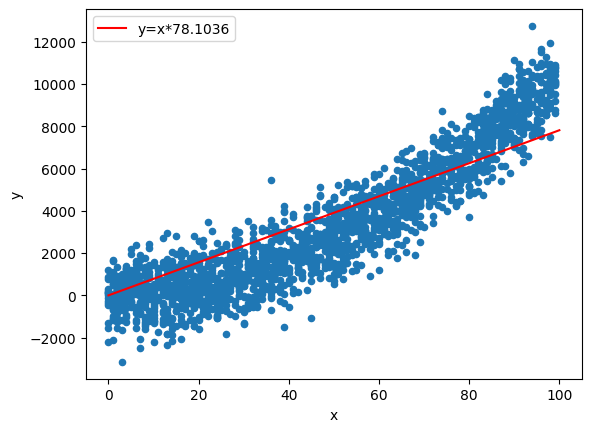

In [194]:
linespace_1 = np.linspace(0, 100, 100)
prediction_1 = modell.predict(np.c_[linespace_1])

data.plot(x="x", y="y", kind="scatter")
plt.plot(linespace_1, prediction_1, color="red", label=f"y=x*{modell.coef_[0]:.4f}")
plt.legend()

In [195]:
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, median_absolute_error

y = data['y']
yd = modell.predict(np.c_[data['x']])

print(f"Model score: {modell.score(np.c_[data['x']], y)}")

for method in [explained_variance_score, mean_squared_error, mean_absolute_error, median_absolute_error]:
    print('{:24s} = {}'.format(method.__name__, method(y, yd)))

res = y - yd
_,pshapiro = shapiro(res)
pttest = ttest_1samp(res, 0)[1]

print('p_shapiro = {:e}'.format(pshapiro))
print('p_ttest   = {:e}'.format(pttest))

Model score: 0.7851997884408757
explained_variance_score = 0.8015184418704752
mean_squared_error       = 2191085.5555450274
mean_absolute_error      = 1207.2943009078774
median_absolute_error    = 1054.1780974495057
p_shapiro = 5.908572e-11
p_ttest   = 3.244642e-36


In [196]:
res.mean()

np.float64(-407.9946564140366)

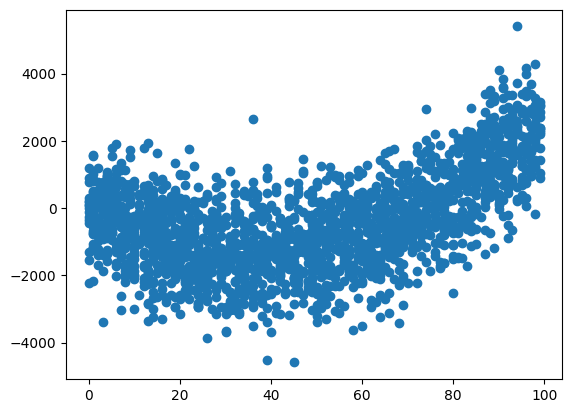

In [197]:
plt.scatter(np.c_[data['x']], res)

## Modell: $y=\beta_0 + x\cdot\beta_1$

In [198]:
modell = linear_model.LinearRegression(fit_intercept = True)
modell.fit(np.c_[data['x']], data['y'])
modell.intercept_, modell.coef_

(np.float64(-1545.1011474207044), array([101.66101359]))

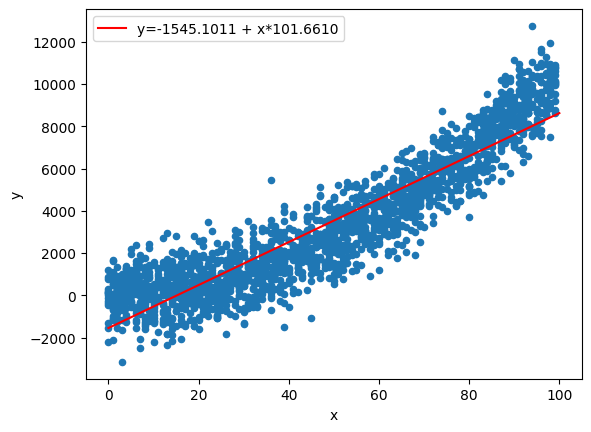

In [199]:
linespace_1 = np.linspace(0, 100, 100)
prediction_2 = modell.predict(np.c_[linespace_1])

data.plot(x="x", y="y", kind="scatter")
plt.plot(linespace_1, prediction_2, color="red", label=f"y={modell.intercept_:.4f} + x*{modell.coef_[0]:.4f}")
plt.legend()

In [200]:
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, median_absolute_error
from scipy.stats import shapiro, ttest_1samp

y = data['y']
yd = modell.predict(np.c_[data['x']])

print(f"Model score: {modell.score(np.c_[data['x']], y)}")

for method in [explained_variance_score, mean_squared_error, mean_absolute_error, median_absolute_error]:
    print('{:24s} = {}'.format(method.__name__, method(y, yd)))

res = y - yd
_,pshapiro = shapiro(res)
pttest = ttest_1samp(res, 0)[1]

print('p_shapiro = {:e}'.format(pshapiro))
print('p_ttest   = {:e}'.format(pttest))

Model score: 0.8469995442515192
explained_variance_score = 0.8469995442515192
mean_squared_error       = 1560692.5437781864
mean_absolute_error      = 1021.8751922986223
median_absolute_error    = 888.712506923546
p_shapiro = 2.493169e-03
p_ttest   = 1.000000e+00


In [201]:
res.mean()

np.float64(1.5006662579253317e-13)

In [202]:
shapiro(res)

ShapiroResult(statistic=np.float64(0.9974572127405423), pvalue=np.float64(0.0024931694902522936))

In [203]:
ttest_1samp(res, 0)

TtestResult(statistic=np.float64(5.370711661530409e-15), pvalue=np.float64(0.9999999999999958), df=np.int64(1999))

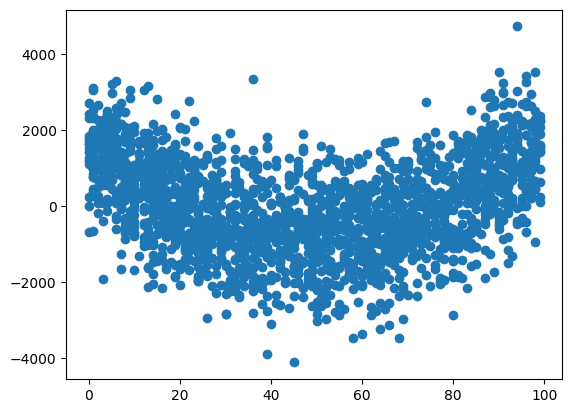

In [204]:
plt.scatter(np.c_[data['x']], res)

## Modell: $y=\beta_0 + x\cdot\beta_1 + x^2\cdot\beta_2$

In [205]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline

pipe = Pipeline([
    ('poly', PolynomialFeatures(degree = 2)),
    ('lreg', LinearRegression(fit_intercept = False))
])

pipe.fit(np.c_[data['x']], data['y'])

feature_names = pipe.named_steps['poly'].get_feature_names_out()
coefs = pipe.named_steps['lreg'].coef_
for n, c in zip(feature_names, coefs):
    print(n, "=", c)

1 = -9.384697129172832
x0 = 5.155865295131037
x0^2 = 0.986294173352869


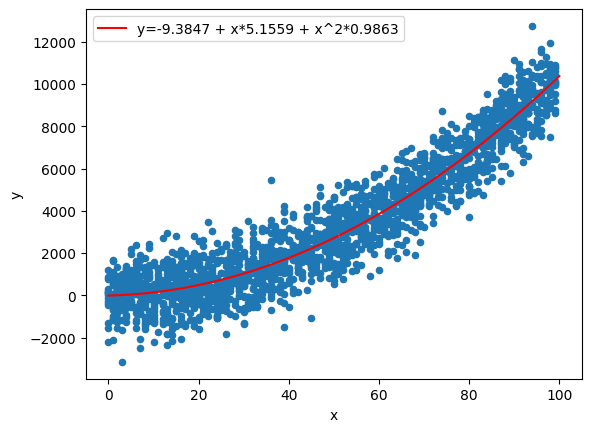

In [206]:
linespace_1 = np.linspace(0, 100, 100)
prediction_3 = pipe.predict(np.c_[linespace_1])

data.plot(x="x", y="y", kind="scatter")
plt.plot(linespace_1, prediction_3, color="red", label=f"y={coefs[0]:.4f} + x*{coefs[1]:.4f} + x^2*{coefs[2]:.4f}")
plt.legend()

In [207]:
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, median_absolute_error

y = data['y']
yd = pipe.predict(np.c_[data['x']])

print(f"Model score: {pipe.score(np.c_[data['x']], y)}")

for method in [explained_variance_score, mean_squared_error, mean_absolute_error, median_absolute_error]:
    print('{:24s} = {}'.format(method.__name__, method(y, yd)))

res = y - yd
_,pshapiro = shapiro(res)
pttest = ttest_1samp(res, 0)[1]

print('p_shapiro = {:f}'.format(pshapiro))
print('p_ttest   = {:f}'.format(pttest))

Model score: 0.8989235445934672
explained_variance_score = 0.8989235445934672
mean_squared_error       = 1031037.9111800158
mean_absolute_error      = 810.1783660117997
median_absolute_error    = 691.0791804189193
p_shapiro = 0.813594
p_ttest   = 1.000000


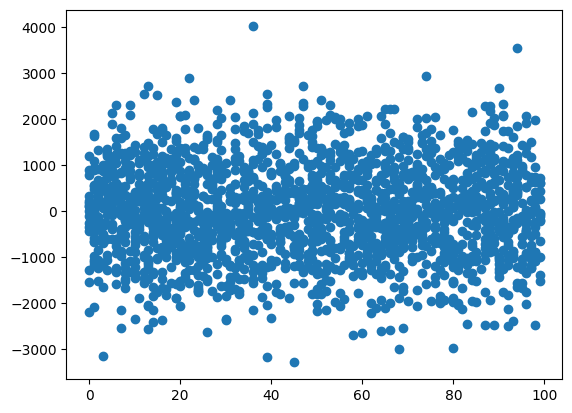

In [208]:
plt.scatter(np.c_[data['x']], res)

In [209]:
res.mean()

np.float64(-3.1959643820300696e-12)

## Modell: $y=\beta_0 + x\cdot\beta_1 + x^2\cdot\beta_2 + x^3\cdot\beta_3 \dots$

In [210]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline

pipe = Pipeline([
    ('poly', PolynomialFeatures(degree = 6)),
    ('lreg', LinearRegression(fit_intercept = False))
])

pipe.fit(np.c_[data['x']], data['y'])

feature_names = pipe.named_steps['poly'].get_feature_names_out()
coefs = pipe.named_steps['lreg'].coef_
for n, c in zip(feature_names, coefs):
    print(n, "=", c)

1 = -117.37145565948191
x0 = 68.29475032198589
x0^2 = -6.141532307452302
x0^3 = 0.304553044236958
x0^4 = -0.0059684390639521395
x0^5 = 5.432994081999709e-05
x0^6 = -1.8627905262746935e-07


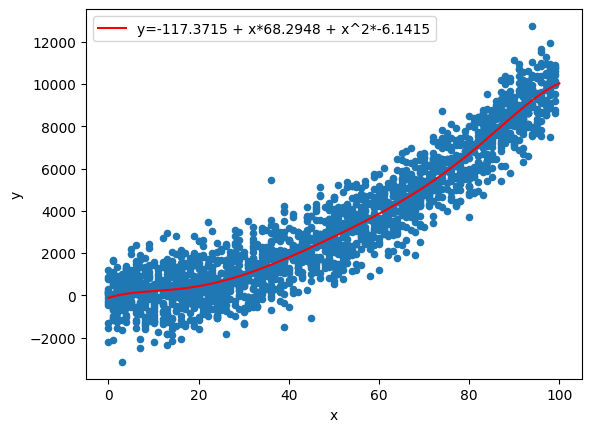

In [211]:
linespace_1 = np.linspace(0, 100, 100)
prediction_4 = pipe.predict(np.c_[linespace_1])

data.plot(x="x", y="y", kind="scatter")
plt.plot(linespace_1, prediction_4, color="red", label=f"y={coefs[0]:.4f} + x*{coefs[1]:.4f} + x^2*{coefs[2]:.4f}")
plt.legend()

In [212]:
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, median_absolute_error

y = data['y']
yd = pipe.predict(np.c_[data['x']])

print(f"Model score: {pipe.score(np.c_[data['x']], y)}")

for method in [explained_variance_score, mean_squared_error, mean_absolute_error, median_absolute_error]:
    print('{:24s} = {}'.format(method.__name__, method(y, yd)))

res = y - yd
_,pshapiro = shapiro(res)
pttest = ttest_1samp(res, 0)[1]

print('p_shapiro = {:f}'.format(pshapiro))
print('p_ttest   = {:f}'.format(pttest))

Model score: 0.8992351893741768
explained_variance_score = 0.8992351893743371
mean_squared_error       = 1027858.9553842213
mean_absolute_error      = 807.7328259117156
median_absolute_error    = 696.6341112838065
p_shapiro = 0.754170
p_ttest   = 0.999955


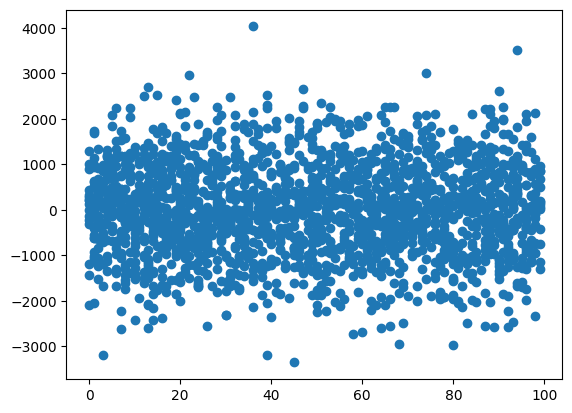

In [213]:
plt.scatter(np.c_[data['x']], res)